<a href="https://colab.research.google.com/github/agatha-aaa/Projeto-de-Desenv.-Web/blob/main/BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tratamento dos Dados do Tribunal de Justiça AM**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install pandas

Importando bibliotecas

In [32]:
In [2]: import pandas as pd
import numpy as np

Trazendo dados do drive

In [33]:
dados = pd.read_csv('/content/drive/MyDrive/dados 2 vara ita familia CSV.csv', sep=';', encoding='latin-1')

In [34]:
dados ['Número do Processo'] = dados ['Número do Processo'].str [11:15]

In [35]:
dados =  dados.rename(columns= {'Número do Processo':'Ano Processo','data_tramitação':'Data Tramitação', 'data_arquivamento':'Data Arquivamento' })

In [36]:
dados.head()

,Foro,Vara,Competência,Ano Processo,Valor da Ação,assunto,Tipo Parte,Idade,Gênero,Data Tramitação,Data Arquivamento,Julgado?,Movimento de Sentença
0,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2019,3600,5802 - Guarda,Polo Passivo,NaN,Masculino,1633,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
1,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2019,3600,5802 - Guarda,Polo Ativo,13.0,Masculino,1633,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
2,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2019,3600,5802 - Guarda,Polo Ativo,NaN,Feminino,1633,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
3,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,1320,5802 - Guarda,Polo Passivo,21.0,Feminino,181,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
4,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,1320,5802 - Guarda,Polo Ativo,NaN,Masculino,181,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença


In [28]:
dados.head()

,Foro,Vara,Competência,Ano Processo,Valor da Ação,assunto,Tipo Parte,Idade,Gênero,Data Tramitação,Data Arquivamento,Julgado?,Movimento de Sentença
1,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2019,3600,5802 - Guarda,Polo Ativo,13.0,Masculino,1633,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
3,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,1320,5802 - Guarda,Polo Passivo,21.0,Feminino,181,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
5,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,500,5801 - Busca e Apreensão de Menores,Polo Passivo,41.0,Masculino,467,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
6,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,500,5801 - Busca e Apreensão de Menores,Polo Ativo,26.0,Feminino,467,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
7,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,1212,6239 - Fixação,Polo Ativo,41.0,Masculino,469,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença


Excluindo linhas com pelo menos um campo nulo

In [37]:
dados = dados.dropna()

Exibindo tabela

In [38]:
dados.head()

,Foro,Vara,Competência,Ano Processo,Valor da Ação,assunto,Tipo Parte,Idade,Gênero,Data Tramitação,Data Arquivamento,Julgado?,Movimento de Sentença
1,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2019,3600,5802 - Guarda,Polo Ativo,13.0,Masculino,1633,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
3,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,1320,5802 - Guarda,Polo Passivo,21.0,Feminino,181,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
5,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,500,5801 - Busca e Apreensão de Menores,Polo Passivo,41.0,Masculino,467,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
6,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,500,5801 - Busca e Apreensão de Menores,Polo Ativo,26.0,Feminino,467,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
7,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,1212,6239 - Fixação,Polo Ativo,41.0,Masculino,469,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença


Excluindo classes processuais da coluna 'assunto' que não precisamos

In [39]:
excluir_assuntos = [
    '12245 - Nomeação',
    '6239 - Fixação',
    '12242 - Levantamento',
    '5788 - Revisão',
    '9543 - Sucessão Provisória',
    '9484 - Sucessão'
]

dadosAss = dados[~dados['assunto'].isin(excluir_assuntos)]

In [40]:
dadosAss.head()

,Foro,Vara,Competência,Ano Processo,Valor da Ação,assunto,Tipo Parte,Idade,Gênero,Data Tramitação,Data Arquivamento,Julgado?,Movimento de Sentença
1,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2019,3600,5802 - Guarda,Polo Ativo,13.0,Masculino,1633,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
3,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,1320,5802 - Guarda,Polo Passivo,21.0,Feminino,181,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
5,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,500,5801 - Busca e Apreensão de Menores,Polo Passivo,41.0,Masculino,467,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
6,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,500,5801 - Busca e Apreensão de Menores,Polo Ativo,26.0,Feminino,467,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
13,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,"4357,5",11782 - Intimação,Polo Ativo,48.0,Feminino,246,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença


Quantidade de linhas e colunas

In [41]:
dadosAss.shape

(4148, 13)

Guardando uma copia da tabela

In [42]:
seg = dadosAss.copy()

Gerando tabela contendo apenas um assunto/classe processual (Guarda)

In [43]:
assunto_especifico = '5802 - Guarda'
AssGuarda = dadosAss[dadosAss['assunto'] == assunto_especifico]

In [44]:
AssGuarda.head()

,Foro,Vara,Competência,Ano Processo,Valor da Ação,assunto,Tipo Parte,Idade,Gênero,Data Tramitação,Data Arquivamento,Julgado?,Movimento de Sentença
1,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2019,3600,5802 - Guarda,Polo Ativo,13.0,Masculino,1633,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
3,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,1320,5802 - Guarda,Polo Passivo,21.0,Feminino,181,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
215,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2024,1412,5802 - Guarda,Polo Ativo,52.0,Feminino,9,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
241,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,1320,5802 - Guarda,Polo Passivo,62.0,Masculino,226,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença
242,Itacoatiara,2ª Vara da Comarca de Itacoatiara,Família,2023,1320,5802 - Guarda,Polo Passivo,25.0,Feminino,226,processo em tramitação,Sem Movimento de Sentença,Sem Movimento de Sentença


In [60]:
AssGuarda.shape

(595, 13)

Periodo dos processos com a classe/assunto Guarda

In [78]:
maiorValor = AssGuarda ['Ano Processo'].max()
menorValor = AssGuarda ['Ano Processo'].min()

menorValor, maiorValor


('2012', '2024')

Quantidade das partes divididas por generos

In [65]:
generos = ['Masculino', 'Feminino']

contagem = AssGuarda['Gênero'].value_counts()

contagem


Gênero
Feminino     303
Masculino    292
Name: count, dtype: int64

Media da tramitação dos processos com o assunto GUARDA

In [66]:
media_dias = AssGuarda['Data Tramitação'].mean()
media_meses = media_dias / 30
media_mesesformat = round(media_meses, 1)
media_mesesformat

18.5

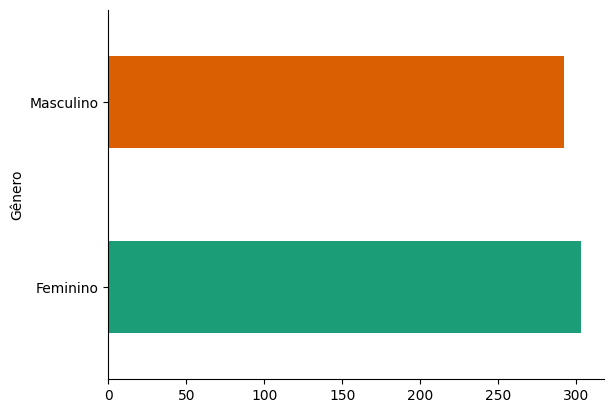

In [226]:
# @title Gênero

from matplotlib import pyplot as plt
import seaborn as sns
AssGuarda.groupby('Gênero').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

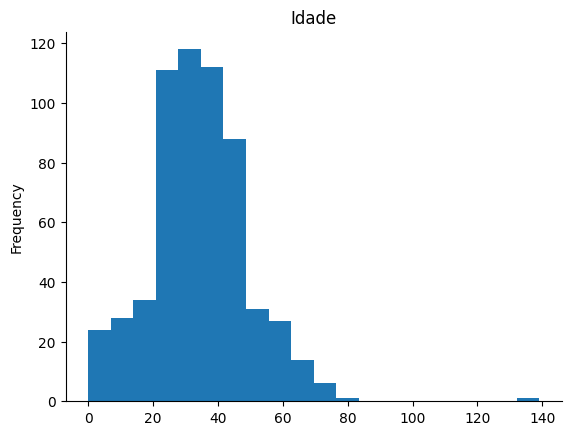

In [224]:
# @title Idade

from matplotlib import pyplot as plt
AssGuarda['Idade'].plot(kind='hist', bins=20, title='Idade')
plt.gca().spines[['top', 'right',]].set_visible(False)

Guardando uma copia da tabela

In [211]:
seg = AssGuarda.copy()